In [4]:
import os
import sys

In [61]:
projectDir = os.path.dirname(os.path.abspath(os.path.curdir))
sys.path.append(os.path.join(projectDir, 'src'))

from data_visualizer import display_recent_overall, display_recent_overall_distribution, display_recent_provincial_distribution

In [62]:
pic_file_1 = os.path.join(projectDir, 'img', 'lineplot_overall.png')
display_recent_overall(pic_file_1)

In [63]:
pic_file_2 = os.path.join(projectDir, 'img', 'overall_distribution.png')
display_recent_overall_distribution(pic_file_2, notebook=True)

In [64]:
pic_file_3 = os.path.join(projectDir, 'img', 'hubei_distribution.png')
display_recent_provincial_distribution('湖北省', pic_file_3, notebook=True)

In [17]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import os
import sys
import sqlite3 as db
import datetime as dt
import pandas as pd

projectDir = os.path.dirname(os.path.abspath(os.path.curdir))
dbFile = os.path.join(projectDir, 'db', '2019_nCov_data.db')

conn = db.connect(dbFile)
cu = conn.cursor()


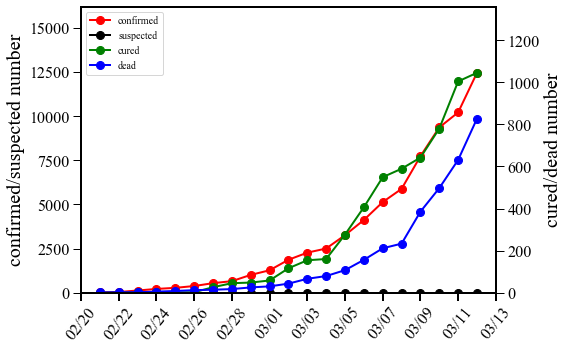

In [18]:
fig, ax1 = plt.subplots(figsize=(8, 5))

s1, = ax1.plot(
    dailyMeanOverall.index,
    dailyMeanOverall['confirmedCount'],
    color='r', marker='o')
s2, = ax1.plot(
    dailyMeanOverall.index,
    dailyMeanOverall['suspectedCount'],
    color='k', marker='o')
ax1.set_ylabel('confirmed/suspected number')
ax1.set_ylim([0, np.max(dailyMeanOverall['confirmedCount']) * 1.3])
ax2 = ax1.twinx()
s3, = ax2.plot(
    dailyMeanOverall.index,
    dailyMeanOverall['curedCount'],
    color='g', marker='o')
s4, = ax2.plot(
    dailyMeanOverall.index,
    dailyMeanOverall['deadCount'],
    color='b', marker='o')
ax2.set_ylabel('cured/dead number')
ax2.set_ylim([0, np.max(dailyMeanOverall['curedCount']) * 1.3])
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=2))
plt.xlim(
    [dt.datetime(2020, 2, 20),
        max(dailyMeanOverall.index) + dt.timedelta(days=1)])
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=50)
plt.legend(
    (s1, s2, s3, s4),
    ('confirmed', 'suspected', 'cured', 'dead'))